In [0]:
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');
import matplotlib.pyplot as plt;
import numpy as np;
import pandas as pd;
import seaborn as sns;
sns.set_context("notebook", font_scale=1.4);
sns.set_style("whitegrid");

In [0]:
#util methods
def plot_errors(a,b,X,y):
	for xi,yi in zip(X,y):
		plt.plot([xi,xi], [yi,a*xi+b], color='red', lw=1)
def plot_regression_path(X,y,alpha,iterations):
	for theta1 in [0.1,0.4,0.7,1,1.1,1.4,1.7,2]:
		cost = cost_function(theta1,0,X,y)
		plt.scatter(theta1,cost)
	X_list = []
	y_list = []
	theta1 = 0.0
	for i in range(iterations):
		next = np.random.randint(len(X))
		predict = np.dot(X[next],theta1)
		X_list.append(theta1)
		y_list.append(cost_function(theta1,0,X,y))
		error = predict-y[next]
		theta1 = theta1 - alpha*error*X[next]
	plt.scatter(X_list,y_list,c="r",s=70)
	plt.plot(X_list,y_list,c="r")
	plt.xlabel('theta1')
	plt.ylabel('J')
	plt.show()		
	return theta1
def plot_linear_regression(simple):
	plt.figure(figsize=(16,10))
	for i,a in enumerate([0.1,0.5,1,1.5,2,2.5]):
		plt.subplot(2,3,i+1)
		plt.scatter(simple['x1'],simple['y'])
		plt.plot(simple['x1'], a*simple['x1'], color='green',linewidth=2)
		plt.title('a='+str(a))  

# 1.1 Linear regression

In the introduction we constructed an instrument to **classify** a raw dermoscopic image of a lesion as either benign or malignant. This required some kind of decision boundary that **separates** these classes as good as possible. 

Suppose we were asked to implement a similar approach to predict the survival time of stage III melanoma patients. In this case the data points will be labeled with a **continuous value** that represents this survival time, i.e. there are no classes. 

In statistics and machine learning modeling a continuous value is known as **regression**. Typical regression tasks include modeling drug effectiveness, toxicity, disease progression, and survival times. In genomics, transcriptomics and proteomics regression is successfully applied to for instance calibrate and allign experiments, assess data quality, and predict expression levels. Regression is a general term for **modeling the relationship** between a **target** (or **dependent variable**) and one or more **features** (or the **independent** or **explanatory variable(s)**). 

To explain regression data analysis we first open a data set that contains relevant information for about 442 patients that are diagnosed with diabetes disease. Each patient is a data point in this data set and is described by 11 features that measure age (AGE), sex (SEX), body mass index (BMI), average blood pressure (BP), together with six blood serum measurements (Sx) as well as the target (Y) that represents a quantitative measure of disease progression one year after baseline.

In [17]:
dataset = pd.read_csv('https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554/master/notebooks/1_regression/diabetes.tsv', sep='\t')
print(dataset.head())
print()
print("Shape of data set: " + str(dataset.shape))

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135

Shape of data set: (442, 11)


The data set was created because diabetes disease progression Y observed for a patient is assumed to be dependent on one or more of the features and we want to know what this potential relationship looks like. Can the exploratory variables **explain** the values observed for Y? If they do then we can use this explanation to **predict** diabetes disease progression for future unseen external patients. 

We could for instance ask ourselves how Y varies with the Body Mass Index (BMI) of a patient? So can we explain disease progression in terms of the BMI? To investigate thiss we plot the relationship between BMI and Y for the patients in the data set in a scatter plot:

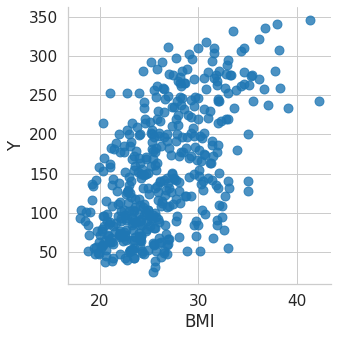

In [18]:
sns.lmplot(x="BMI", y="Y", data=dataset,
           fit_reg=False, height=5, scatter_kws={"s": 80})
plt.show()

Just by looking at this patient data we can already see a trend: values for Y seem to be larger for larger values of the BMI. From this data we can estimate or **model** the relationship between the BMI and diabetes disease progression Y, assuming that there is one. Such a **regresssion model** explains Y in terms of BMI.

To compute such a model, we need to make **assumptions about the true underlying model that generated the data**. A common and straightforward assumption is that the relationship between the two variables is **linear**, i.e. disease progression varies linearly with the BMI. 

In this case we use the term **linear regression model** that assumpes that the target varies linearly with the features. **Fitting** a linear regression model is known **linear regression**.

To correctly apply linear regression we need to normalize the features. 

Form scikit-learn we use the `StandardScaler` module to standardize the features and the target. We first create `StandardScaler` objects (`feature_scaler` and `label_scaler`) and then let them compute the mean and variances of the features and label respectively, i.e. both scaler objects will remember these values such that **they can be used later to correctly normalize future feature vectors**.

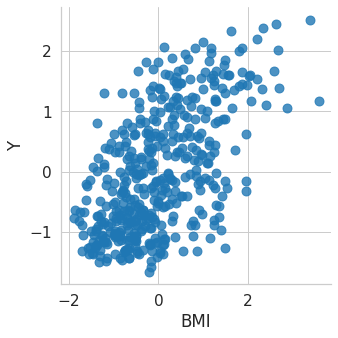

In [19]:
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler()
feature_scaler.fit(dataset[['BMI']])

label_scaler = StandardScaler()
label_scaler.fit(dataset[['Y']])

dataset['BMI'] = feature_scaler.transform(dataset[['BMI']])
dataset['Y'] = label_scaler.transform(dataset[['Y']])

sns.lmplot(x="BMI", y="Y", data=dataset,
           fit_reg=False, height=5, scatter_kws={"s": 80})
plt.show()

Now we plot the (linear) function

$$f(x) = 0.5\cdot x + 0.2,$$

and consider it as the linear relationship between BMI and Y.

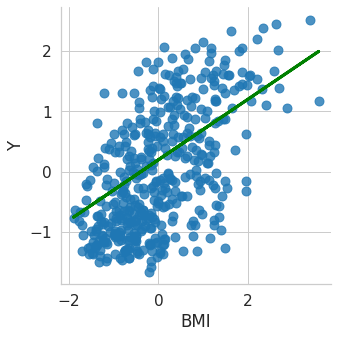

In [20]:
a = 0.5
b = 0.2

sns.lmplot(x="BMI", y="Y", data=dataset,
           fit_reg=False, height=5, scatter_kws={"s": 80})
plt.plot(dataset['BMI'], a*dataset['BMI']+b, color='green',linewidth=3)
plt.show()

The green line (called a **regression line**) can thus be described as 

$$f(x) = ax+b = 0.5\cdot x + 0.2,$$

and formulates a model of the data, i.e. the linear relationship between BMI and Y could be explained by this linear function. 

The function $f(x)$ has two parameters $a$ and $b$. We call these the **model parameters**. Here $a$ is called the slope or gradient of the linear function and describes the direction of the line and $b$ is called the intercept or bias of the model and describes the position or offset of the model.

If $f(x)$ indeed estimates the true relationship between BMI and Y accurately then we can use this function to predict Y for any BMI value! This means that we have **generalized** the data we have about BMI and Y to the green linear function.

A person that weighs 70 kg and measures 1.8 meters long has a BMI of $70/(1.8 \times 1.8)=21.6$. Suppose we would feed this BMI to the model $f(x) = 0.5\cdot x + 0.2$ to compute the expected value for Y: 

f(21.6) = 11.0


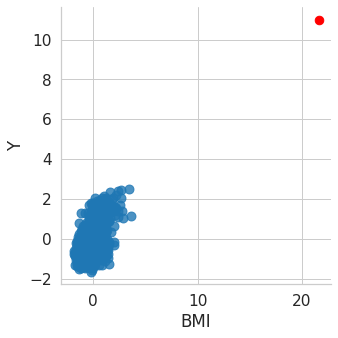

In [21]:
test_point = 21.6
print("f({}) = {}".format(test_point,a*test_point+b))

sns.lmplot(x="BMI", y="Y", data=dataset,
           fit_reg=False, height=5, scatter_kws={"s": 80})
plt.scatter(test_point,a*test_point+b,s=73,color='red')

plt.show()

This doesn't look very good! The problem is that we standardized the features in the data set but did not do this for the test point BMI = 21.6. 

So we need to first scale the test point **in the same way we normalized the data set**:

f([[-1.08218016]]) = [[-0.34109008]]


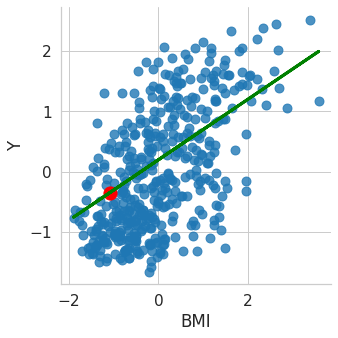

In [22]:
test_point = feature_scaler.transform([[21.6]])
prediction = a*test_point+b
print("f({}) = {}".format(test_point,prediction))

sns.lmplot(x="BMI", y="Y", data=dataset,
           fit_reg=False, height=5, scatter_kws={"s": 80})
plt.plot(dataset['BMI'], a*dataset['BMI']+b, color='green',linewidth=3)
plt.scatter(test_point,prediction,s=173,color='red')
plt.show()

For the predicted value -0.341090 we have the same issue as we did also scale Y in the data set. Therefor we need to transform this prediction back to the scale of Y in the original data set:

In [23]:
predicted_Y = label_scaler.inverse_transform(prediction)
print("Actual prediction of Y for BMI = 21.6 is {}.".format(predicted_Y))

Actual prediction of Y for BMI = 21.6 is [[125.86758795]].


Different values for $a$ and $b$ produce different linear models and different outputs for $f(x)$. A question arises: **what values for $a$ and $b$ fit the data best**? How can we evaluate that? 

The answers is the **goodness of fit** metric that is computed as the **sum of squares of the errors** $SS_{error}$ that the model makes for the data points $x^{(i)}$:

$$SS_{error} = \sum_{i=1}^{n} (y^{(i)} - f(x^{(i)}))^2,$$

where $y^{(i)}$ is the target for data point $x^{(i)}$. 

The sum $SS_{error}$ (a.k.a. the **residual sum of squares**) is typically normalized such that it can be compared among experiments with different numbers of data points. To do this we compute the **total sum of squares** as


$$SS_{total} = \sum_{i=1}^{n} (y^{(i)} - \bar{y})^2,$$


where $\bar{y}$ is the mean of all values $y^{(i)}$. 

The goodness of fit is called the **coefficient of determination** $R^2$ and is computed as 

$$R^2 = 1 - \frac{SS_{error}}{SS_{total}}.$$

In general $R^2$ indicates how well a certain data set fits a certain statistical model (or *vice versa*). In our case this model is a linear relationship between the feature BMI and the target Y. A $R^2$ value close to one indicates a strong linear relationship, while a value close to zero indicates no linear relationship. 

Let's consider our fit $f(x)=0.5x+0.2$. The following code plots the individual **errors** (also called the **residuals**) for each of the data points $x^{(i)}$ as red lines:

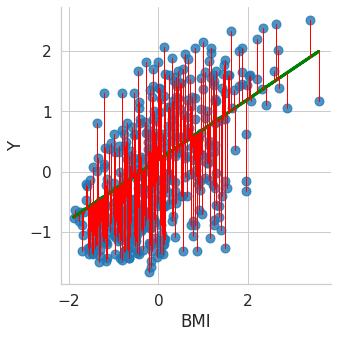

In [24]:
sns.lmplot(x="BMI", y="Y", data=dataset,
           fit_reg=False, height=5, scatter_kws={"s": 80})
plt.plot(dataset['BMI'], a*dataset['BMI']+b, color='green',linewidth=3)
plot_errors(a,b,dataset['BMI'],dataset['Y'])
plt.show()

Then $SS_{error}$ is computed by summing the squared length of each red line. Similarly we can plot the individual errors of $SS_{total}$:

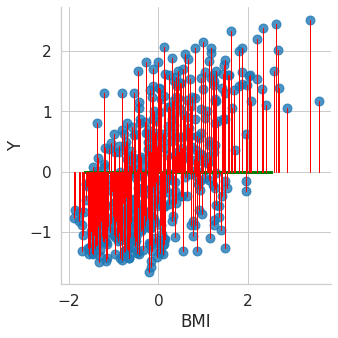

In [25]:
sns.lmplot(x="BMI", y="Y", data=dataset,
           fit_reg=False, height=5, scatter_kws={"s": 80})
plt.plot(dataset['Y'], [dataset['Y'].mean() for i in range(len(dataset['Y']))], color='green',linewidth=3)
plot_errors(0,0,dataset['BMI'],dataset['Y'])
plt.show()

The coefficient of determination $R^2$ is then one minus the ratio of these two squared error sums. We can compute it as follows:

In [26]:
def compute_R_squared(X,y,a,b):
    E = ((y - (a*X+b))**2).sum()
    V = ((y - y.mean())**2).sum()
    return 1.0 - (E/V)
    
print("R-squared = {}".format(compute_R_squared(dataset['BMI'],dataset['Y'],a,b)))

R-squared = 0.2964501344746884


So the error $R^2 = 0.296$. We can also use the scikit-learn module `metrics` to compute $R^2$ with one command: 

In [27]:
from sklearn import metrics

print("R-squared = {}".format(metrics.r2_score(dataset['Y'],a*dataset['BMI']+b)))

R-squared = 0.2964501344746884


Now let's try a better fit and plot it:

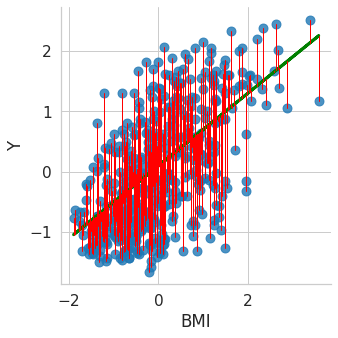

R-squared = 0.33374016136962625


In [28]:
a = 0.6
b = 0.1

sns.lmplot(x="BMI", y="Y", data=dataset,
           fit_reg=False, height=5, scatter_kws={"s": 80})
plt.plot(dataset['BMI'], a*dataset['BMI']+b, color='green',linewidth=3)
plot_errors(a,b,dataset['BMI'],dataset['Y'])
plt.show()

print("R-squared = {}".format(metrics.r2_score(dataset['Y'],a*dataset['BMI']+b)))

The goodness of fit $R^2$ does indeed increase. This is clearly a better fit of the data. 

So, how do we get the best fit? The objective of **linear regression** (and regression is general) is to find the best-fitting model through a set of data points that minimizes the squared errors. 

First we notice that in our case the best fit will always be obtained with $b=0$. This is because we standardized the data in the preprocessing step such that no intercept is required. 

Let's see what happens when we set $b=0$:

In [29]:
b = 0

print("R-squared = {}".format(metrics.r2_score(dataset['Y'],a*dataset['BMI']+b)))

R-squared = 0.34374016136962626


Clearly better. This simplifies the algorithm to find the best fit considerably. 

The algorithm discussed in this course to compute the optimal values for $a$ (and $b$) is called **gradient descent**. To explain this **optimization algorithm** we first load a very simple data set and center the data:

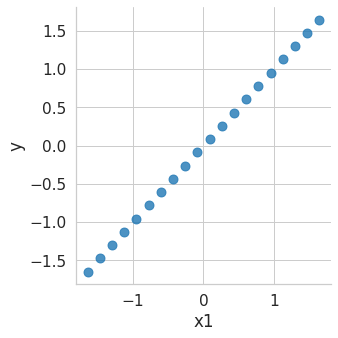

In [30]:
simple = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554/master/notebooks/1_regression/simple.csv")

sns.lmplot(x="x1", y="y", data=simple,
           fit_reg=False, height=5, scatter_kws={"s": 80})
plt.show()

In this data set feature $x_1$ perfectly explains target $y$ by the linear relationship $f(x)=x$. 

We can vary the slope $a$ and plot the resulting linear models:

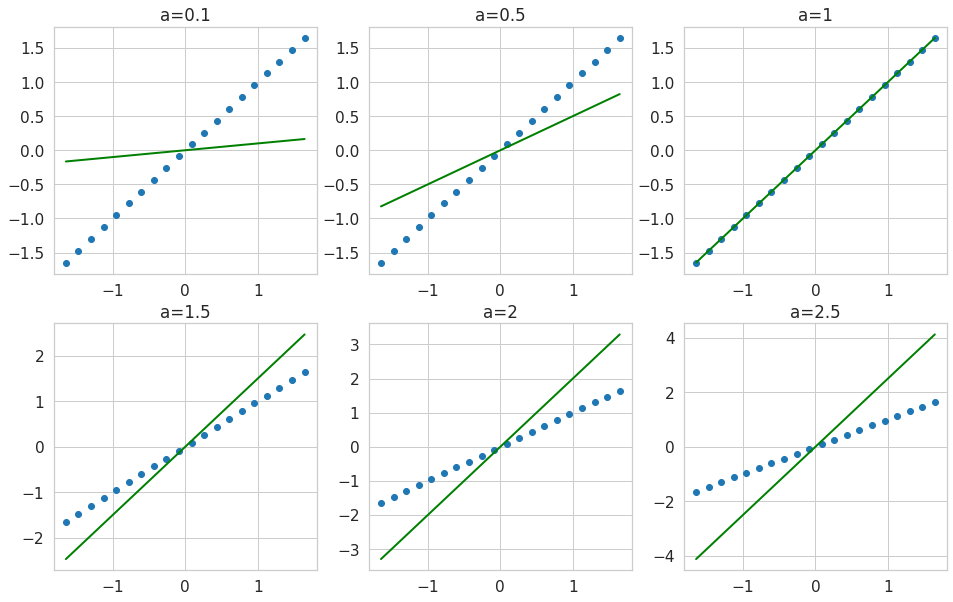

In [31]:
plot_linear_regression(simple)
plt.show()

(Notice also how the scale of the y-axis changes.)

For each of these models we can assign a cost function

$$J(a,b)=\frac{1}{2n}\sum\limits_{i=1}^n(f(x^{(i)},(a,b)) - y^{(i)})^2,$$

that is very similar to the sum of squared errors we have seen to compute the goodness of fit. We can see that we are again summing the squared errors:

In [0]:
def cost_function(a,b,X,y):
    return (1.0/2*len(y))*((y - (a*X+b))**2).sum()

We can plot the value of $J(a,b=0)$ for the models we have constructed above:

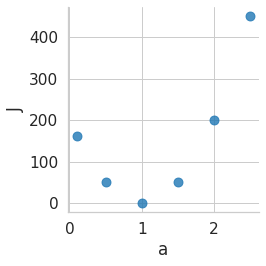

In [33]:
pd_cost = pd.DataFrame()
pd_cost['a'] = [0.1,0.5,1,1.5,2,2.5]
pd_cost['J'] = [cost_function(x,0,simple['x1'],simple['y']) for x in pd_cost['a']]

sns.lmplot(x="a", y="J", data=pd_cost,
           fit_reg=False, height=4, scatter_kws={"s": 80})
plt.show()

We can do the same for many more values of $a$:

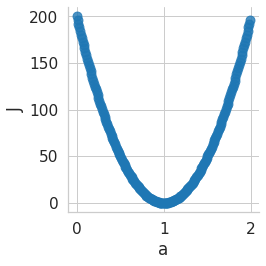

In [34]:
pd_cost = pd.DataFrame()
pd_cost['a'] = np.arange(0,2,0.01)
pd_cost['J'] = [cost_function(x,0,simple['x1'],simple['y']) for x in pd_cost['a']]

sns.lmplot(x="a", y="J", data=pd_cost,
           fit_reg=False, height=4, scatter_kws={"s": 80})
plt.show()

We see that for $a=1$ the value of $J$ is minimal. We also know that the true function that generated the data is $f(x)=x$, so $a$ indeed equals 1. In order to find the optimal values for $a$ and $b$ we thus need to **minimize $J(a,b)$**. 

To find the optimal value for $a$ we apply the **gradient descent optimization algorithm**. The idea behind this algorithm is to make the locally optimal choice and iterate to the best local solution. As we will see this algorithm does not guarantee the optimal solution, but in practice it has been shown repeatedly to efficiently compute accurate complex regression models.

So far we have been calling the model parameters for the linear model $a$ and $b$. As we will be discussing models with many more parameters we will from now on refer to the model parameters using one symbol $\theta$. In the model discussed above $\theta=(b,a)$. We will note these as $\theta=(\theta_0,\theta_1)$ (so $\theta_1=a$ and $\theta_0=b$). The cost function $J$ becomes

$$J(\theta)=\frac{1}{2n}\sum\limits_{i=1}^n(f(x^{(i)},\theta) - y^{(i)})^2.$$

The linear model for $m$ features is written as

$$f(x,\theta)=\theta_0x_0 + \theta_1x_1 + \theta_2x_2+...+\theta_mx_m = \theta^{\prime} x,$$

where $x_0$ always equals zero. 

For the model discussed above $m=1$. Using this notation the gradient descent algorithm **works as follows**:

**(1)** Start with some random initialization of $\theta$, i.e. a randomly chosen model;

**(2)** increment or decrement the value(s) of $\theta$ slightly such that $J(\theta)$ is reduced;

**(3)** repeat step (2) until convergence.

Step (2) is the 'magic' step that achieves learning. Here it is determined how the current state of the model needs to be altered to better fit the data. How do we change the value(s) of $\theta$ to better fit the data, i.e. to reduce $J(\theta)$?

We can do this by taking steps proportional to the negative of the gradient of the function at the current point:

$$-\frac{\partial}{\partial\theta_j}J(\theta)$$

where $j$ ranges over the model parameters ($j=0,1,\ldots,m$). Without going into the mathematics, $J(\theta)$ decreases fastest if one goes from $\theta_j$ in the direction of the negative gradient of $J(\theta)$ at $\theta_j$, for each model parameter $j$. We can thus use the gradients of $J(\theta)$ at each $\theta_j$ to compute the update in step (2).

The gradient descent optimization algorithm starts by assigning random values to $\theta$. Next, the fit $f(x,\theta)$ is tested on the dataset (called the **training set**) and the values of $\theta$ are then updated as

$$\theta_0:=\theta_0-\alpha\frac{1}{n}\sum\limits_{i=1}^n(f(x^{(i)},\theta)-y^{(i)})x_0^{(i)},$$

$$\theta_1:=\theta_1-\alpha\frac{1}{n}\sum\limits_{i=1}^n(f(x^{(i)},\theta)-y^{(i)})x_1^{(i)},$$

$$\theta_2:=\theta_2-\alpha\frac{1}{n}\sum\limits_{i=1}^n(f(x^{(i)},\theta)-y^{(i)})x_2^{(i)},$$

$$\ldots$$

The parameter $\alpha$ is known as the **learning rate**. As you can see it determines the scale of each update. These updates are repeated for a number of **iterations**.

For the linear model discussed above $\theta_1=a$ and $\theta_0=b=0$. In this case $\theta_1$ is updated as

$$\theta_1:=\theta_1-\alpha\frac{1}{n}\sum\limits_{i=1}^n(f(x^{(i)},\theta)-y^{(i)})x_1^{(i)}.$$

The following code implements the python function `linear_regression()` that takes as arguments a data set $(X,y)$, the learning rate $\alpha$ and the number of update iterations that need to be performed. It computes the optimal value of $\theta_1$ using the gradient descent algorithm.

In [0]:
# Function performs linear regression using gradient descent.
# Parameters:
# X = feature vectors
# y = target
# alpha = gradient descent learning rate
# iterations = number of iterations in gradient descent
def linear_regression(X,y,alpha,iterations):
    # intialize theta1 with random value
    theta1 = 3
    #theta1 = -3
    for i in range(iterations):
        # select random feature vector
        next = np.random.randint(len(X))
        # predict target
        predict = np.dot(X[next],theta1)
        # compute prediction error
        error = predict - y[next]
        # update theta1 such that cost function decreases
        theta1 = theta1 - alpha*error*X[next]
    return theta1

We can now run this function on the simple data set loaded above:

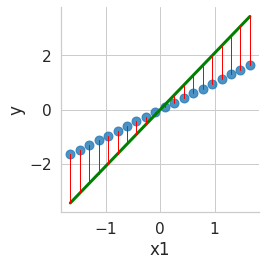

theta1 = 2.0854222712990165
R-squared = -0.17814150703191567


In [36]:
theta1 = linear_regression(simple['x1'],simple['y'],0.1,10)
#theta1 = regression(simple['x1'],simple['y'],0.1,20)
#theta1 = regression(simple['x1'],simple['y'],0.1,40)
#theta1 = regression(simple['x1'],simple['y'],0.1,100)
#theta1 = regression(simple['x1'],simple['y'],0.1,100000)

sns.lmplot(x="x1", y="y", data=simple,
           fit_reg=False, height=4, scatter_kws={"s": 80})
plt.plot(simple['x1'], theta1*simple['x1'], color='green',linewidth=3)
plot_errors(theta1,0,simple['x1'],simple['y'])
plt.show()

print("theta1 = {}".format(theta1))
print("R-squared = {}".format(metrics.r2_score(simple['y'],theta1*simple['x1'])))

We can trace the updates made by the function `linear_regression()` and plot the iteration path on the cost function $J$:

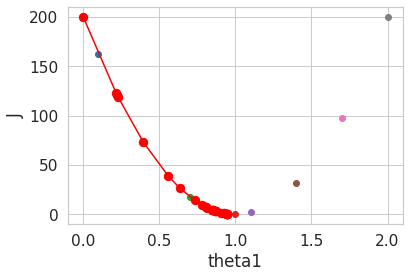

theta1 = 0.9509278600508578
R-squared = 0.9975919250808118


In [37]:
theta1 = plot_regression_path(simple['x1'],simple['y'],0.1,30)

print("theta1 = {}".format(theta1))
print("R-squared = {}".format(metrics.r2_score(simple['y'],theta1*simple['x1'])))

We can play with the learning rate $\alpha$ and set it to 10 and observe how convergence becomes more difficult. Set it to 50 and convergence is impossible. A typical value for $\alpha$ is 0.1 for simple tasks and 0.01 for real world prediction tasks.

So far we used only one feature $x_1$, which was BMI. Suppose we want to use all the variables in the dataset, i.e. $m=10$ in the linear model

$$f(x,\theta)=\theta_0x_0 + \theta_1x_1 + \theta_2x_2+...+\theta_mx_m.$$

We can do this using the methods in the scikit-learn module. First the features are normalized with the scikit-learn function `scale()` such that each column has zero mean and unit variance:

In [0]:
target = dataset.pop('Y')

feature_scaler = StandardScaler()
dataset_scaled = pd.DataFrame(feature_scaler.fit_transform(dataset),columns=dataset.columns.values)

Now we use scikit-learn to compute the optimal fit with the `SGDRegressor` module:

In [39]:
from sklearn import linear_model

#eta0 is the learning rate used for gradient descent
model = linear_model.SGDRegressor(eta0=0.001) 
model.fit(dataset_scaled,target)

print("R-squared = {}".format(metrics.r2_score(target,model.predict(dataset_scaled))))

R-squared = 0.4999822142787699


 This is a much better fit than what was obtained with using **BMI** only. 